[19.68872446  1.1114099   3.0196291   4.88220957]


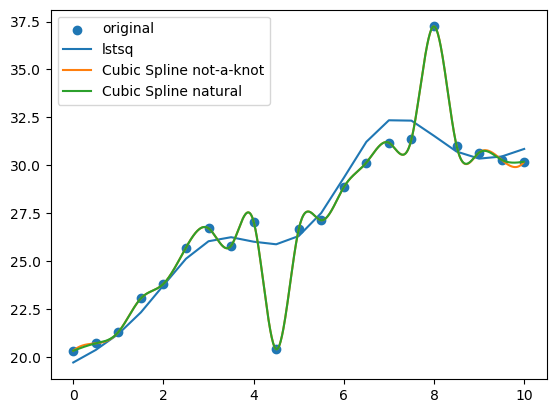

In [51]:
# Week 6 retry 

import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import pandas as pd 

data = np.loadtxt('./gauss.dat.txt')

# lstsq 
t = data[:, 0]
Y = data[:, 1]
A = np.ones((len(t), 4))
A[:, 1] = t
A[:, 2] = np.exp(-(t-3)**2 / 2)
A[:, 3] = np.exp(-(t-7)**2/2)
sol = scipy.linalg.lstsq(A, Y)
tsl = sol[0]
print(tsl)
ysol = tsl[0] + tsl[1] * t + tsl[2]*np.exp(-(t-3)**2 / 2) + tsl[3]*np.exp(-(t-7)**2/2)

# cubic spline not a knot
cs = scipy.interpolate.CubicSpline(t, Y)
# cubic spline natural spline
ns = scipy.interpolate.CubicSpline(t, Y, bc_type = 'natural')

x = np.arange(0, 10, 0.01)

plt.figure()
plt.scatter(t,Y, label='original')
plt.plot(t, ysol, label='lstsq')
plt.plot(x, cs(x), label='Cubic Spline not-a-knot')
plt.plot(x, ns(x), label='Cubic Spline natural')
plt.legend()
plt.show()

In [93]:
cs_deriv = cs.derivative(1)
cs_deriv(3/4)
#help(scipy.interpolate.CubicSpline)

array(1.00011878)

In [99]:
cs_integral = cs.integrate(1, 0)
cs_integral

array(-20.75384304)

In [139]:
# forier transform
#help(scipy.fft.fft)
w = scipy.fft.fft(Y)
m = len(w)
for i in w:
    print(i)

a0 = w[0]/m 
a = []
b = [] 
for index in range(1, len(w)):
    a_k = 2*np.real(w[index]) / m
    a.append(a_k)
    b_k = -2*np.imag(w[index])/m
    b.append(b_k)

tlo = -0.5 
thi = 0.5
tplt = np.linspace(tlo, thi, 501)
L = len(t) * 0.5 
k = np.linspace(0, len(t), 1)
a_0 = a0 * np.ones(len(a))
yplt = a0 + a @ np.cos(2*np.pi* k@tplt / L) + b @ np.sin(2*np.pi*k@tplt / L)

(569.7549131052278-0j)
(-11.095458360067248+47.002550877601585j)
(-27.58252585438403+11.243910077359505j)
(-1.814196036868827+12.305750523402423j)
(1.590964425567254+0.3641015164630872j)
(-5.682599182451754+14.539455324184733j)
(-6.019719630091642+4.465249061064978j)
(-12.74080218365495-0.9125895176130633j)
(6.659661119569283-0.13339549867319445j)
(-6.402670957764102-0.33287787456304674j)
(-8.265285009013553+11.756798399359262j)
(-8.265285009013553-11.756798399359262j)
(-6.402670957764102+0.33287787456304674j)
(6.659661119569283+0.13339549867319445j)
(-12.74080218365495+0.9125895176130633j)
(-6.019719630091642-4.465249061064978j)
(-5.682599182451754-14.539455324184733j)
(1.590964425567254-0.3641015164630872j)
(-1.814196036868827-12.305750523402423j)
(-27.58252585438403-11.243910077359505j)
(-11.095458360067248-47.002550877601585j)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 501 is different from 1)

In [163]:
yplt = np.zeros_like(tplt)
yplt[:] = a[0]
L = m * (t[1] - t[0])
two_pi_over_L = 2 * np.pi / L
mbar = t.max()
print(mbar)
for k in range(1, int(mbar)+1):
    theta = two_pi_over_L * k * tplt
    yplt += a[k] * np.cos(theta) + b[k-1] * np.sin(theta)
print(yplt)

10.0
[ 2.76761492  2.75056847  2.73319944  2.71550736  2.69749182  2.67915244
  2.66048886  2.64150077  2.62218789  2.60254998  2.58258682  2.56229824
  2.5416841   2.5207443   2.49947877  2.47788747  2.45597042  2.43372765
  2.41115924  2.38826529  2.36504596  2.34150143  2.31763192  2.29343768
  2.26891902  2.24407624  2.21890973  2.19341989  2.16760715  2.14147198
  2.1150149   2.08823646  2.06113724  2.03371787  2.00597899  1.97792131
  1.94954556  1.92085249  1.89184293  1.8625177   1.83287769  1.80292381
  1.77265701  1.74207827  1.71118863  1.67998913  1.64848088  1.616665
  1.58454268  1.5521151   1.51938351  1.48634918  1.45301344  1.41937762
  1.38544311  1.35121133  1.31668374  1.28186182  1.2467471   1.21134115
  1.17564555  1.13966194  1.10339199  1.06683739  1.02999988  0.99288124
  0.95548325  0.91780777  0.87985666  0.84163183  0.80313522  0.7643688
  0.72533458  0.68603459  0.64647091  0.60664565  0.56656094  0.52621895
  0.48562189  0.44477198  0.40367149  0.36232273 